In [1]:
import sys
import os
workPath = os.path.abspath('..')
if not workPath in sys.path:
    sys.path.append(workPath)

In [2]:
import os

from everest import built
from everest.window import Fetch, Reader

import planetengine

In [3]:
outputPath = '../out'
frameName = 'Nuftest8'

In [4]:
myreader = Reader(os.path.join(outputPath, frameName) + '.frm')

In [5]:
attrDict = myreader.view_attrs()

In [6]:
attrDict['f'][0.2]

Scope([('atheasluedru-iglaedwiixi', '...'), ('iglioklifle-osneesouwo', '...'), ('aplieflaxi-oshaifuosfo', '...'), ('itreiwookri-uflokruikwe', '...'), ('thaogroeli-asiodrueto', '...')])

In [7]:
system = built.load(frameName, list(attrDict['f'][0.2])[0][0], outputPath)

In [8]:
system.load(max(system.counts_captured))

Variable{8774115632595}



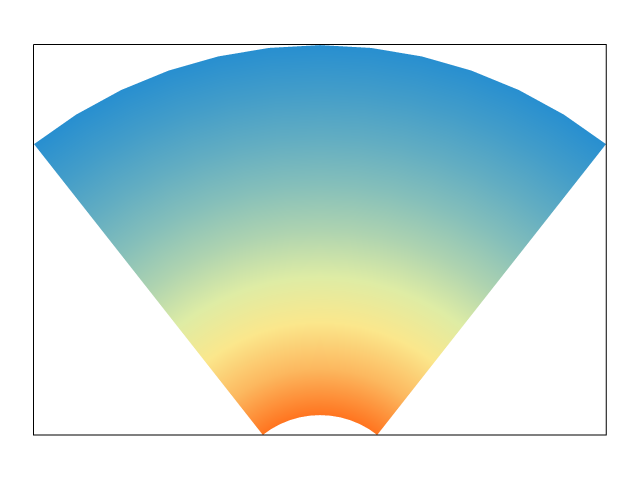

In [9]:
planetengine.quickShow(system.locals.temperatureField)

In [10]:
observer = planetengine.observers.standard.build(system)
observer.update()
observer.outDict['Nu'].evaluate()

array([[ 0.52695139]])

In [11]:
loadIC = planetengine.initials.load.Load(system, 'temperatureField')

In [12]:
system.params

{'Ra': 1.0,
 'aspect': 1.0,
 'dither': 0,
 'f': 0.2,
 'res': 8,
 'seed': 0,
 'urey': 0.0}

In [13]:
newParams = {**system.params}
newParams['res'] = 64

In [14]:
system2 = planetengine.systems.isovisc.build(**newParams, _initial_temperatureField = loadIC)

Variable{8774194694969}



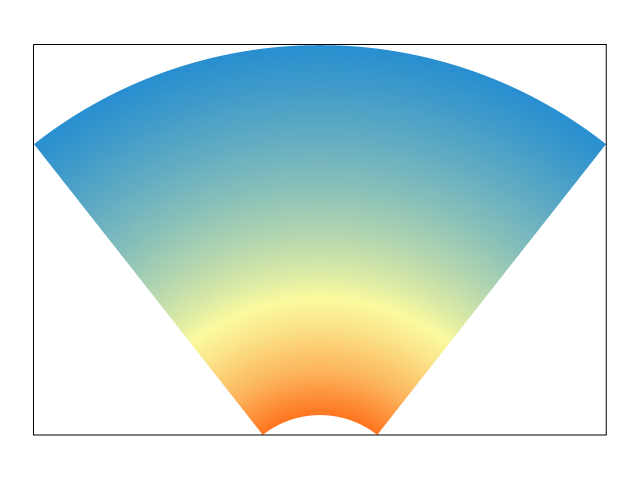

In [15]:
planetengine.quickShow(system2.locals.temperatureField)

In [16]:
system2.iterate(100)

Variable{8774194694969}



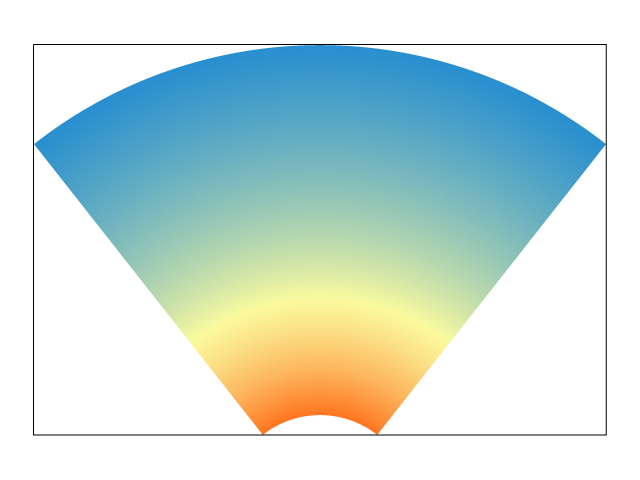

In [17]:
planetengine.quickShow(system2.locals.temperatureField)

In [18]:
observer2 = planetengine.observers.standard.build(system2)

In [19]:
observer2.update()

In [20]:
observer2.outDict['Nu'].evaluate()

array([[ 0.52925525]])